## Support Vector Machine

In [118]:
from src.svm_mod import SVM_model
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import src.utils as utils
import seaborn as sns

In [119]:
import importlib
import src.svm_mod
importlib.reload(utils)
importlib.reload(src.svm_mod)

<module 'src.svm_mod' from 'c:\\Users\\musta\\OneDrive\\Escritorio\\machine_learning_project\\ml-project-uab\\src\\svm_mod.py'>

### Without Outliers

In [105]:
df = pd.read_csv("data/diamonds.csv")
X_train, X_test, y_train, y_test= utils.preprocessing_LOS(df)

Let's try to fit the SVM model into our data and observe the score we get without modifying any hyperparameter

In [28]:
# create our classifier and fit it to our data
clf = SVM_model(random_state=42)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print("Accuracy: ", score)


c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy:  0.7502653364466143


The model gives an accuracy of 0.75. Using grid search for a parameter such as C can increase this accuracy. 

At first, we'll try to set parameter values to default 0, 0.1, 10. Then we identify that the ranges should be more narrow in order to get the optimal value for C. We keep on computing grid search until we find a C that cannot be further improved.

In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 1, 10]}
clf = SVM_model(random_state=42)
grid_search = GridSearchCV(clf, parameters, verbose=10, n_jobs = -1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, grid_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'C': 10} 0.7723497412763699


c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [30]:

parameters = {'C':[10, 12, 15]}
clf = SVM_model(random_state=42)
grid_search = GridSearchCV(clf, parameters, verbose=10, n_jobs = -1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, grid_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'C': 15} 0.7734377073106009


c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [31]:
parameters = {'C':[14, 15, 16]}
clf = SVM_model(random_state=42)
grid_search = GridSearchCV(clf, parameters, verbose=10, n_jobs = -1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, grid_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


{'C': 16} 0.773835743664588


c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


We found the best value for C is 16. Now let's fit the model, this time, using our new hyperparameter value that maximizes our accuracy.

In [121]:
# create our classifier with scaling and desired hyperparameters
clf = SVM_model(C=16)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print("Accuracy: ", score)

c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy:  0.7776480577372108


Can it be further improved? Let's try setting class_weight to balanced to automatically adjust weights inversely proportional to class frequencies in the input data.

In [123]:
# create our classifier with scaling and desired hyperparameters
clf_bal = SVM_model(C=16, class_weight = 'balanced')
clf_bal.fit(X_train, y_train)

score = clf_bal.score(X_test, y_test)
print("Accuracy: ", score)

c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy:  0.7556781999575461


Now we'll see that applying a different kernel other than the radial basis function (rbf) will potentially diminish our accuracy. This may be due to the nature of the dataset having multiple features and causing the feature space to be non-linear. Applying a polynomial, lineal or sigmoid kernel is not suitable for this problem as we can see in the following scores. Any fine-tuning to these kernel implementations won't be worth it.

In [99]:
# create our classifier with best hyperparameters and a polynomial kernel

kernels = ['linear', 'poly', 'sigmoid'] # 'rbf' is default and is not included
for kernel in kernels:
    clf = SVM_model(C=16, kernel=kernel)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    print("Accuracy of ", kernel,":", score)

c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy of  linear : 0.3117172574824878


c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy of  poly : 0.3415410740819359
Accuracy of  sigmoid : 0.4828061982593929


Let's compute the metrics for our final clf model for SVM.

In [51]:
clf.compute_metrics(X_test, y_test)

{'accuracy': 0.7776480577372108,
 'precision': 0.7296786389413988,
 'recall': 0.546742209631728,
 'f1': 0.6251012145748988}

The scores are low for the recall and f1. Is it due to an imbalance in classes? Let's test the recall and f1 on the clf_bal that has the weights balanced for each class.

In [124]:
clf_bal.compute_metrics(X_test, y_test)

{'accuracy': 0.7556781999575461,
 'precision': 0.5914893617021276,
 'recall': 0.7875354107648725,
 'f1': 0.6755771567436208}

As we can see, we increased the recall and f1 scores but we decreased accuracy and precision. Balancing class weights often helps address issues related to imbalanced datasets by giving more importance to the minority class. However, it might affect precision negatively, as the model becomes more inclusive of positive predictions. 

Since for this problem we want to minimize false positives as much as possible an get a high accuracy we'll stick with our clf model's accuracy.

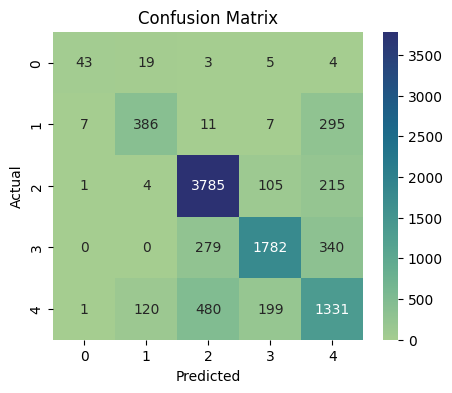

In [92]:
conf_matrix = clf.conf_matrix(X_test, y_test)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="crest")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()